In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('datasets\\BIG-Malware-Dataset-from-Microsoft.csv')

In [176]:
data.head()

,asm_commands_add,asm_commands_call,asm_commands_cdq,asm_commands_cld,asm_commands_cli,asm_commands_cmc,asm_commands_cmp,asm_commands_cwd,asm_commands_daa,asm_commands_dd,...,asm_commands_sti,asm_commands_stos,asm_commands_sub,asm_commands_test,asm_commands_wait,asm_commands_xchg,asm_commands_xor,line_count_asm,size_asm,Class
0,436,646.0,0.0,10.0,9.0,0.0,228.0,0.0,56.0,89930,...,1.0,0.0,892.0,53.0,10.0,0.0,162.0,118529,6874624,2
1,469,262.0,0.0,4.0,1.0,4.0,185.0,4.0,20.0,3464,...,3.0,7.0,846.0,8.0,0.0,9.0,19.0,7937,460288,8
2,1587,1828.0,0.0,0.0,31.0,0.0,689.0,0.0,904.0,24833,...,1.0,0.0,4005.0,680.0,44.0,0.0,418.0,90625,5256192,9
3,213,227.0,0.0,0.0,3.0,0.0,127.0,0.0,132.0,71979,...,0.0,0.0,437.0,78.0,0.0,0.0,199.0,83201,4825600,9
4,36,76.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,112,...,2.0,3.0,82.0,16.0,0.0,0.0,18.0,12289,712704,1


In [177]:
data.shape

(10868, 69)

In [178]:
data.columns

Index(['asm_commands_add', 'asm_commands_call', 'asm_commands_cdq',
       'asm_commands_cld', 'asm_commands_cli', 'asm_commands_cmc',
       'asm_commands_cmp', 'asm_commands_cwd', 'asm_commands_daa',
       'asm_commands_dd', 'asm_commands_dec', 'asm_commands_dw',
       'asm_commands_endp', 'asm_commands_faddp', 'asm_commands_fchs',
       'asm_commands_fdiv', 'asm_commands_fdivr', 'asm_commands_fistp',
       'asm_commands_fld', 'asm_commands_fstp', 'asm_commands_fword',
       'asm_commands_fxch', 'asm_commands_imul', 'asm_commands_in',
       'asm_commands_inc', 'asm_commands_ins', 'asm_commands_jb',
       'asm_commands_je', 'asm_commands_jg', 'asm_commands_jl',
       'asm_commands_jmp', 'asm_commands_jnb', 'asm_commands_jno',
       'asm_commands_jo', 'asm_commands_jz', 'asm_commands_lea',
       'asm_commands_mov', 'asm_commands_mul', 'asm_commands_not',
       'asm_commands_or', 'asm_commands_out', 'asm_commands_outs',
       'asm_commands_pop', 'asm_commands_push', 'asm_com

In [179]:
data.dtypes.value_counts()

float64    62
int64       7
Name: count, dtype: int64

In [180]:
data.isnull().sum()

asm_commands_add     0
asm_commands_call    0
asm_commands_cdq     0
asm_commands_cld     0
asm_commands_cli     0
                    ..
asm_commands_xchg    0
asm_commands_xor     0
line_count_asm       0
size_asm             0
Class                0
Length: 69, dtype: int64

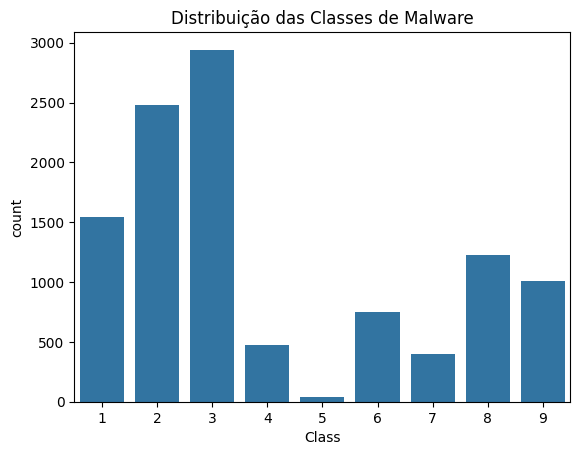

In [181]:
sns.countplot(x='Class', data=data)
plt.title('Distribuição das Classes de Malware')
plt.show()

In [182]:
X = data.drop('Class', axis=1)
y = data['Class']

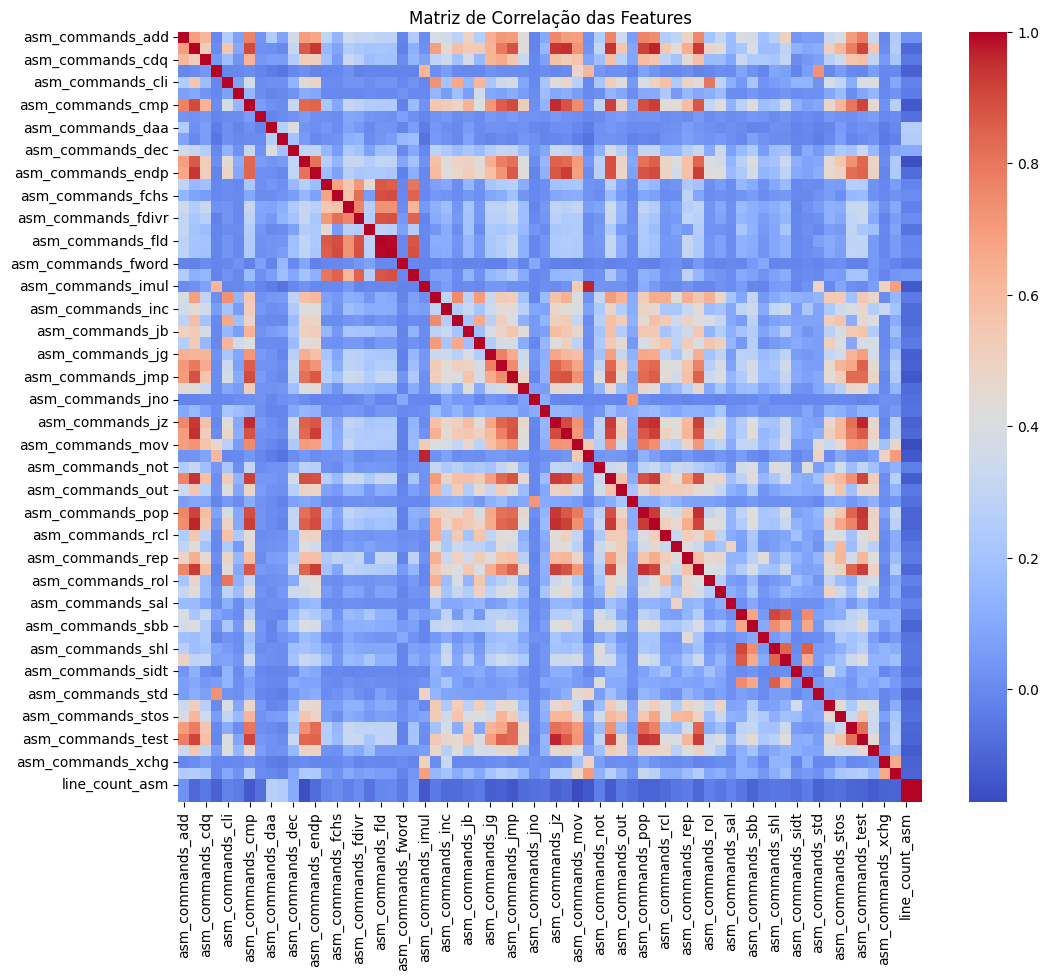

In [183]:
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Matriz de Correlação das Features')
plt.show()

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(f'Acurácia: {score}')


Acurácia: 0.9917203311867525


In [185]:
X_test[1:5]

,asm_commands_add,asm_commands_call,asm_commands_cdq,asm_commands_cld,asm_commands_cli,asm_commands_cmc,asm_commands_cmp,asm_commands_cwd,asm_commands_daa,asm_commands_dd,...,asm_commands_std,asm_commands_sti,asm_commands_stos,asm_commands_sub,asm_commands_test,asm_commands_wait,asm_commands_xchg,asm_commands_xor,line_count_asm,size_asm
901,72,165.0,0.0,0.0,6.0,0.0,2.0,0.0,2.0,167,...,39.0,0.0,0.0,201.0,3.0,4.0,1.0,47.0,146689,8507904
2959,828,1553.0,0.0,0.0,9.0,0.0,707.0,4.0,86.0,3252,...,303.0,3.0,0.0,3760.0,680.0,32.0,0.0,358.0,15617,905728
2657,113,200.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,180,...,34.0,0.0,0.0,320.0,5.0,4.0,1.0,52.0,146433,8493056
10583,566,384.0,16.0,7.0,9.0,0.0,161.0,0.0,82.0,85819,...,249.0,1.0,28.0,501.0,64.0,11.0,0.0,139.0,113409,6577664


In [186]:
y_test[1:5]

901      3
2959     9
2657     3
10583    2
Name: Class, dtype: int64

In [187]:
y_pred = model.predict(X_test[1:5])
y_pred

array([3, 9, 3, 2])

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
print(f'MEA: {mean_absolute_error(y_pred, y_test)}')
print(f'MSE: {mean_squared_error(y_pred, y_test)}')

MEA: 0.03986507206378412
MSE: 0.24471021159153633


In [189]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[478   0   0   0   0   0   0   2   0]
 [  2 736   1   0   0   0   0   0   0]
 [  0   0 874   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0]
 [  2   0   0   0  11   0   0   2   0]
 [  2   0   0   0   0 208   0   1   0]
 [  0   0   0   0   0   0 118   0   0]
 [  6   0   1   0   0   2   1 358   0]
 [  4   0   0   0   0   1   0   0 304]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       480
           2       1.00      1.00      1.00       739
           3       1.00      1.00      1.00       874
           4       1.00      1.00      1.00       147
           5       1.00      0.73      0.85        15
           6       0.99      0.99      0.99       211
           7       0.99      1.00      1.00       118
           8       0.99      0.97      0.98       368
           9       1.00      0.98      0.99       309

    accuracy                           0.99      3261
   macro avg       0.99      0.96      0.98      326